### Libraries

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib inline

In [124]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Functions

In [125]:
def convert_monetary(temp_df,column_name):
    temp_df[column_name] = temp_df[column_name].fillna('$0')
    temp_df[column_name] = temp_df[column_name].apply(lambda p:p.replace('$','').replace(',',''))
    temp_df[column_name] = pd.to_numeric(temp_df[column_name], downcast='float')

In [126]:
def convert_binary_column(temp_df,column_name):
    temp_df.loc[temp_df[column_name] == 'f',column_name] = False
    temp_df.loc[temp_df[column_name] == 't',column_name] = True

In [127]:
def plot_value_counts(dfc,title,xlabel,ylabel,image_name,rotation=21,width=8, height=6):
    plt.figure(num=None, figsize=(width, height), dpi=80, facecolor='w', edgecolor='k')
    price_mean = sns.barplot(x=dfc.index,y=dfc.values,color="blue")
    price_mean.set(xlabel=xlabel, ylabel=ylabel)
    price_mean.set_title(title)
    plt.xticks(rotation=rotation)
    figure = price_mean.get_figure()    
    plt.savefig(image_name, dpi=80)

In [128]:
# Calculate distance between two coordenates and convert to kilometers
def haversine_vectorize(lon1, lat1, lon2=-71.0762861, lat2=42.3503789):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [129]:
def calc_prop(data):
    data['prop'] = data['april']/data['accommodates']
    return data

## 1. Exploratory Data Analysis

### 1.1. Exploratory Calendar Data Analisys

In [130]:
df_calendar = pd.read_csv('calendar.csv')
dfc_calendar = df_calendar.copy()
dfc_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [131]:
dfc_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


- How many ids?

In [132]:
len(dfc_calendar['listing_id'].unique())

3585

- What's the interval of time

In [133]:
pd.to_datetime(dfc_calendar['date'].max())-pd.to_datetime(dfc_calendar['date'].min())

Timedelta('364 days 00:00:00')

- Available column distribution

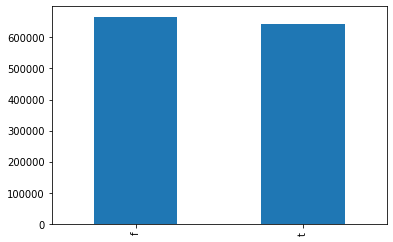

In [134]:
dfc_calendar['available'].value_counts().plot.bar()

- Price missing values

> The prices missing are because the available value.

### Converting values

In [135]:
convert_monetary(dfc_calendar,'price')
convert_binary_column(dfc_calendar,'available')

In [136]:
dfc_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,0.0
1,12147973,2017-09-04,False,0.0
2,12147973,2017-09-03,False,0.0
3,12147973,2017-09-02,False,0.0
4,12147973,2017-09-01,False,0.0


In [137]:
dfg = dfc_calendar[(dfc_calendar['available'] == True)].groupby('listing_id').agg({'price':['count','mean', 'std','min','max']})

In [138]:
dfg.head()

price                                     
           count        mean        std    min    max
listing_id                                           
3353         249   35.204819   1.302222   32.0   36.0
5506         344  147.267441  17.043196  145.0  275.0
6695         324  197.407410  17.553301  195.0  325.0
6976         319   65.000000   0.000000   65.0   65.0
8792         248  154.000000   0.000000  154.0  154.0

In [139]:
t = dfc_calendar[(dfc_calendar['price'] > 0.0)]

In [140]:
tt = t.loc[t.groupby('listing_id')['price'].idxmin()] 

In [141]:
tt['year'] = pd.to_datetime(tt['date']).dt.year
tt['month'] = pd.to_datetime(tt['date']).dt.month

In [142]:
tt.head()

,listing_id,date,available,price,year,month
1207578,3353,2017-01-14,True,32.0,2017,1
284700,5506,2017-09-05,True,145.0,2017,9
312075,6695,2017-09-05,True,195.0,2017,9
730,6976,2017-05-12,True,65.0,2017,5
770150,8792,2017-09-05,True,154.0,2017,9


In [143]:
tt['month'].value_counts()

9     1051
12     488
3      232
2      218
1      142
6      142
11     138
7      121
10     118
8      107
5       82
4       67
Name: month, dtype: int64

In [144]:
ttt = t.loc[t.groupby('listing_id')['price'].idxmax()] 
ttt['year'] = pd.to_datetime(ttt['date']).dt.year
ttt['month'] = pd.to_datetime(ttt['date']).dt.month
ttt['month'].value_counts()

9     917
10    396
12    327
4     290
8     172
11    170
6     157
3     136
7     133
5     112
1      75
2      21
Name: month, dtype: int64

In [145]:
sum(dfg['price']['min'] < dfg['price']['max'])

1873

In [146]:
sum(dfg['price']['min'] == dfg['price']['max'])

1033

In [147]:
1873/(1873+1033),1033/(1873+1033),

(0.6445285615966965, 0.35547143840330353)

In [148]:
dfg[dfg['price']['min'] < dfg['price']['max']].head()

price                                     
           count        mean        std    min    max
listing_id                                           
3353         249   35.204819   1.302222   32.0   36.0
5506         344  147.267441  17.043196  145.0  275.0
6695         324  197.407410  17.553301  195.0  325.0
9765         362  236.856354  41.440693  192.0  490.0
9824         323  222.321976  46.645836  209.0  490.0

In [149]:
dfg = dfc_calendar[(dfc_calendar['available'] == True)].groupby('listing_id').agg({'price':['count','mean', 'std','min','max','idxmax','idxmin']})

In [150]:
dfg.head()

price                                                       
           count        mean        std    min    max   idxmax   idxmin
listing_id                                                             
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578
5506         344  147.267441  17.043196  145.0  275.0   284838   284700
6695         324  197.407410  17.553301  195.0  325.0   312215   312075
6976         319   65.000000   0.000000   65.0   65.0      730      730
8792         248  154.000000   0.000000  154.0  154.0   770150   770150

In [151]:
dfg['date_min'] = dfc_calendar.reindex(dfg['price']['idxmin'])['date'].values
dfg['date_max'] = dfc_calendar.reindex(dfg['price']['idxmax'])['date'].values

In [152]:
dfg.head()

price                                                         \
           count        mean        std    min    max   idxmax   idxmin   
listing_id                                                                
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578   
5506         344  147.267441  17.043196  145.0  275.0   284838   284700   
6695         324  197.407410  17.553301  195.0  325.0   312215   312075   
6976         319   65.000000   0.000000   65.0   65.0      730      730   
8792         248  154.000000   0.000000  154.0  154.0   770150   770150   

              date_min    date_max  
                                    
listing_id                          
3353        2017-01-14  2017-09-05  
5506        2017-09-05  2017-04-18  
6695        2017-09-05  2017-04-18  
6976        2017-05-12  2017-05-12  
8792        2017-09-05  2017-09-05

In [153]:
dfg['year_min'] = pd.to_datetime(dfg['date_min']).dt.year
dfg['month_min'] = pd.to_datetime(dfg['date_min']).dt.month
dfg['year_max'] = pd.to_datetime(dfg['date_max']).dt.year
dfg['month_max'] = pd.to_datetime(dfg['date_max']).dt.month
dfg.head()

price                                                         \
           count        mean        std    min    max   idxmax   idxmin   
listing_id                                                                
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578   
5506         344  147.267441  17.043196  145.0  275.0   284838   284700   
6695         324  197.407410  17.553301  195.0  325.0   312215   312075   
6976         319   65.000000   0.000000   65.0   65.0      730      730   
8792         248  154.000000   0.000000  154.0  154.0   770150   770150   

              date_min    date_max year_min month_min year_max month_max  
                                                                          
listing_id                                                                
3353        2017-01-14  2017-09-05     2017         1     2017         9  
5506        2017-09-05  2017-04-18     2017         9     2017         4  
6695        2017-09-05  2017-04-18     2017         9     2017         4  
6976        2017-05-12  2017-05-12     2017         5     2017         5  
8792        2017-09-05  2017-09-05     2017         9     2017         9

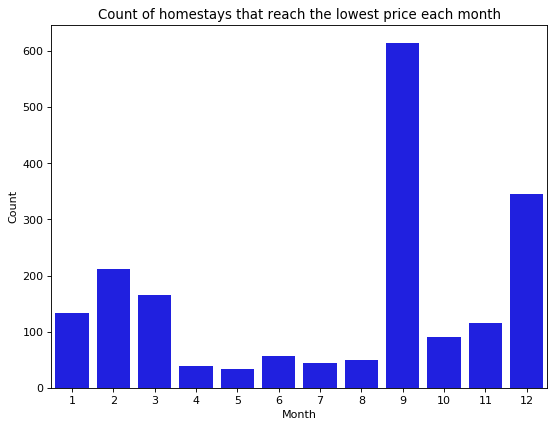

In [154]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
t1 = dfg[dfg['price']['std'] != 0]['month_min'].value_counts().sort_index()
ax_max = sns.barplot(x=t1.index,y=t1.values,color="blue")
ax_max.set_title('Count of homestays that reach the lowest price each month')
ax_max.set(xlabel='Month', ylabel='Count')
figure = ax_max.get_figure()    
plt.savefig('count_min.png', dpi=1024)
plt.show()

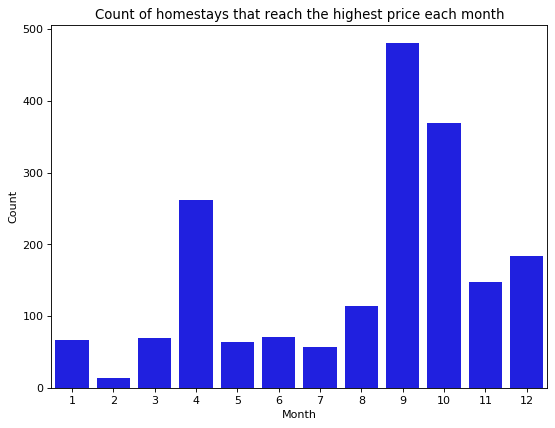

In [155]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
t1 = dfg[dfg['price']['std'] != 0]['month_max'].value_counts().sort_index()
ax_max = sns.barplot(x=t1.index,y=t1.values,color="blue")
ax_max.set_title('Count of homestays that reach the highest price each month')
ax_max.set(xlabel='Month', ylabel='Count')
figure = ax_max.get_figure()    
plt.savefig('count_max.png', dpi=1024)
plt.show()

- Number of accommodations that reached the highest / lowest price each month.
- The number of higher priced accommodations in April and September are explained by the marathon and carnival that take place in the respective months.

In [156]:
dfc_calendar['year'] = pd.to_datetime(dfc_calendar['date']).dt.year
dfc_calendar['month'] = pd.to_datetime(dfc_calendar['date']).dt.month

In [157]:
mp = dfc_calendar[dfc_calendar['price'] > 0].groupby(['year','month'])['price'].mean()
mp

year  month
2016  9        252.677307
      10       233.416245
      11       202.924423
      12       192.601913
2017  1        182.799667
      2        180.961029
      3        181.818741
      4        197.252884
      5        193.712296
      6        196.535309
      7        202.486313
      8        203.330139
      9        194.658325
Name: price, dtype: float32

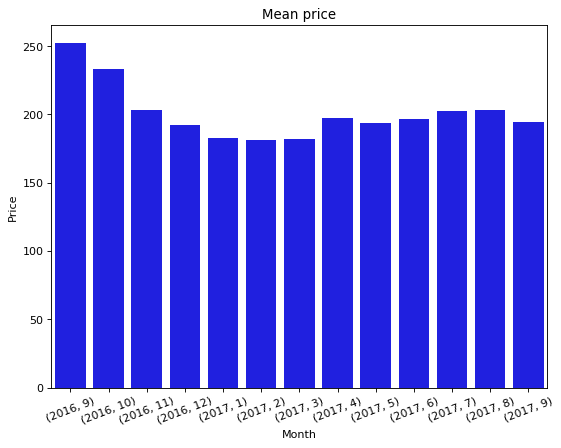

In [158]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
price_mean = sns.barplot(x=mp.index,y=mp.values,color="blue")
price_mean.set(xlabel='Month', ylabel='Price')
price_mean.set_title('Mean price')
plt.xticks(rotation=21)
figure = price_mean.get_figure()    
plt.savefig('mean_price.png', dpi=1024)

In [159]:
dfc_calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'year', 'month'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

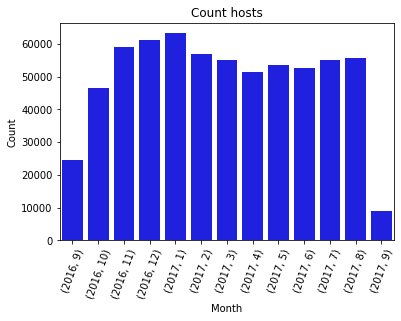

In [160]:
coutns = dfc_calendar[dfc_calendar['available'] == True].groupby(['year','month'])['price'].count()
counts_fig = sns.barplot(x=coutns.index,y=coutns.values,color="blue")
counts_fig.set(xlabel='Month', ylabel='Count')
counts_fig.set_title('Count hosts')
plt.xticks(rotation=70)

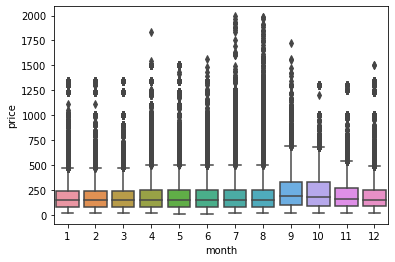

In [161]:
sns.boxplot(data=dfc_calendar[(dfc_calendar['price'] > 0) & (dfc_calendar['price'] < 2000)],x='month',y='price')

In [162]:
dfc_calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,False,0.0,2017,9
1,12147973,2017-09-04,False,0.0,2017,9
2,12147973,2017-09-03,False,0.0,2017,9
3,12147973,2017-09-02,False,0.0,2017,9
4,12147973,2017-09-01,False,0.0,2017,9


In [163]:
prices = dfc_calendar[dfc_calendar['price'] > 0].groupby(['listing_id'])['price'].mean()

In [164]:
prices = prices.reset_index()

In [165]:
prices.head()

,listing_id,price
0,3353,35.204819
1,5506,147.267441
2,6695,197.407410
3,6976,65.000000
4,8792,154.000000


## 2. Listings

In [166]:
df_listings = pd.read_csv('listings.csv')
dfc_listings = df_listings.copy()

In [167]:
dfc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pric",none,"Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian foods; for a wide variety of delicious cheeses and chocolates go to the Cheese Cellar on Birch St.",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Cle

- Removing columns with no diversity

In [168]:
dfc_listings = dfc_listings.drop(columns=['experiences_offered','neighbourhood_group_cleansed','has_availability','requires_license',
   'license','jurisdiction_names','square_feet'])

- Fixing columns with binary values

In [169]:
temp_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact']
for tc in temp_columns:
    dfc_listings[tc] = dfc_listings[tc].apply(lambda x: True if x == 't' else False)

- Fixing columns with monetary values

In [170]:
convert_monetary(dfc_listings,'cleaning_fee')
dfc_listings['cleaning_fee'].head()

0    35.0
1    10.0
2     0.0
3    50.0
4    15.0
Name: cleaning_fee, dtype: float32

In [171]:
convert_monetary(dfc_listings,'security_deposit')
dfc_listings['security_deposit'].head()

0      0.0
1     95.0
2      0.0
3    100.0
4      0.0
Name: security_deposit, dtype: float32

- Counting the number of homestays in each neighbourhood

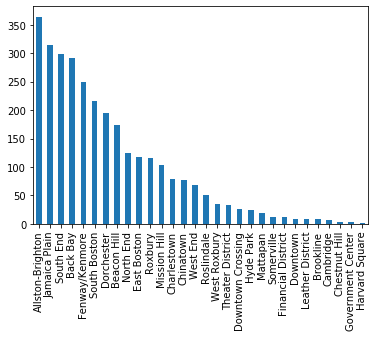

In [172]:
dfc_listings['neighbourhood'].value_counts().plot(kind='bar')

In [173]:
dfc = dfc_listings['neighbourhood'].value_counts()

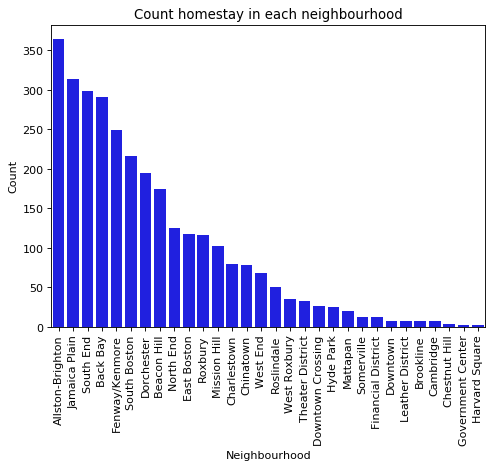

In [174]:
plot_value_counts(dfc,'Count homestay in each neighbourhood','Neighbourhood','Count','count_neigh.png',90,7,5)

In [175]:
dfc_calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,False,0.0,2017,9
1,12147973,2017-09-04,False,0.0,2017,9
2,12147973,2017-09-03,False,0.0,2017,9
3,12147973,2017-09-02,False,0.0,2017,9
4,12147973,2017-09-01,False,0.0,2017,9


In [176]:
dfc_34 = dfc_calendar[dfc_calendar['month'].isin([3,4,5])].groupby(['listing_id','month'])['price'].mean().reset_index()

In [177]:
dfc_34.head()

,listing_id,month,price
0,3353,3,35.354839
1,3353,4,36.000000
2,3353,5,36.000000
3,5506,3,145.000000
4,5506,4,171.000000


In [178]:
dfc = dfc_34.pivot(index='listing_id', columns='month', values='price').reset_index()
dfc.head()

month,listing_id,3,4,5
0,3353,35.354839,36.0,36.0
1,5506,145.000000,171.0,145.0
2,6695,195.000000,221.0,195.0
3,6976,65.000000,65.0,65.0
4,8792,154.000000,154.0,154.0


In [179]:
dfc.rename(columns={3:'march',4:'april',5:'may'},inplace=True)
dfc.columns

Index(['listing_id', 'march', 'april', 'may'], dtype='object', name='month')

In [180]:
dfc['diff'] = dfc['march']-dfc['april']
dfc['diff2'] = dfc['april']-dfc['may']

In [181]:
dfc[dfc['diff'] > 0].shape,dfc[dfc['diff'] < 0].shape,dfc[dfc['diff'] == 0].shape

((546, 6), (707, 6), (2332, 6))

In [182]:
707/dfc.shape[0]

0.19721059972105998

In [183]:
dfc[dfc['diff2'] > 0].shape,dfc[dfc['diff2'] < 0].shape,dfc[dfc['diff2'] == 0].shape

((565, 6), (396, 6), (2624, 6))

In [184]:
dfc[dfc['diff'] > 0].head()

month,listing_id,march,april,may,diff,diff2
21,12441,399.000000,356.833344,399.000000,42.166656,-42.166656
32,23619,177.903229,145.666672,177.580643,32.236557,-31.913971
41,29765,295.000000,279.466675,295.000000,15.533325,-15.533325
77,93505,199.000000,185.733337,199.000000,13.266663,-13.266663
83,163941,230.806458,192.166672,230.161285,38.639786,-37.994614


In [185]:
dfc[dfc['diff2'] > 0].head()

month,listing_id,march,april,may,diff,diff2
1,5506,145.0,171.000000,145.0,-26.000000,26.000000
2,6695,195.0,221.000000,195.0,-26.000000,26.000000
6,9765,229.0,281.200012,229.0,-52.200012,52.200012
7,9824,209.0,274.566681,209.0,-65.566681,65.566681
9,9857,342.0,426.000000,342.0,-84.000000,84.000000


> 3% das hospegens aumentam o preço no mês de abril e retornam ao preço anterior em maio. 2% das hospegens diminuem o preço no mês de abril e retornam ao preço anterior em maio. Alteram o preço no período da maratona. Talvez este comportamento se repita durante o resto do ano.

In [186]:
len(dfc[(dfc['march'] == dfc['may']) & (dfc['march'] < dfc['april'])])/dfc.shape[0]

0.0301255230125523

In [187]:
len(dfc[(dfc['march'] == dfc['may']) & (dfc['march'] > dfc['april'])])/dfc.shape[0]

0.02203626220362622

In [188]:
2332/3585,707/3585,546/3585

(0.6504881450488145, 0.19721059972105998, 0.15230125523012553)

In [189]:
len(dfc['listing_id'].unique())

3585

In [190]:
list_neighbourhood = dfc_listings['neighbourhood'].value_counts().index

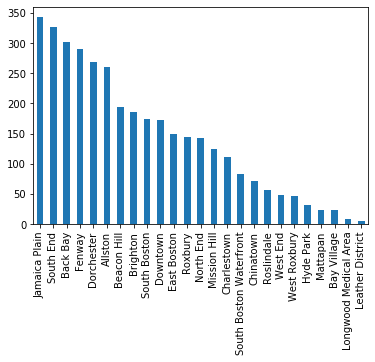

In [191]:
dfc_listings['neighbourhood_cleansed'].value_counts().plot(kind='bar',)

- Join the dataframes to calculate the mean price of each neighbourhood.

In [192]:
dfc_listings = dfc_listings.merge(dfc, left_on='id', right_on='listing_id')
dfc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,march,april,may,diff,diff2
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pric","Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian foods; for a wide variety of delicious cheeses and chocolates go to the Cheese Cellar on Birch St.",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Clean up and treat the home the way you'd like your home to be treated. No smoking.,https://

In [193]:
list_neighbourhood

Index(['Allston-Brighton', 'Jamaica Plain', 'South End', 'Back Bay',
       'Fenway/Kenmore', 'South Boston', 'Dorchester', 'Beacon Hill',
       'North End', 'East Boston', 'Roxbury', 'Mission Hill', 'Charlestown',
       'Chinatown', 'West End', 'Roslindale', 'West Roxbury',
       'Theater District', 'Downtown Crossing', 'Hyde Park', 'Mattapan',
       'Somerville', 'Financial District', 'Downtown', 'Leather District',
       'Brookline', 'Cambridge', 'Chestnut Hill', 'Government Center',
       'Harvard Square'],
      dtype='object')

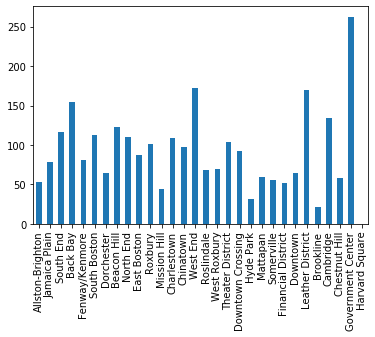

In [194]:
dfc_listings.groupby('neighbourhood')['april'].mean()[list_neighbourhood].plot(kind='bar')
#bar_ax = sns.barplot(ax=ax,data=dfc_listings,x='neighbourhood',y='price_y',hue='room_type',order=list_neighbourhood)

- Converting Haver distance

In [195]:
dfc_dist = dfc_listings.groupby('neighbourhood')[['latitude','longitude']].mean().reset_index()
dfc_dist.head()

,neighbourhood,latitude,longitude
0,Allston-Brighton,42.351369,-71.139800
1,Back Bay,42.349543,-71.080150
2,Beacon Hill,42.359162,-71.067222
3,Brookline,42.341502,-71.125128
4,Cambridge,42.363323,-71.108006


In [196]:
dfc_dist['dist'] = dfc_dist.apply(lambda x: haversine_vectorize(x['longitude'],x['latitude']),axis=1)

In [197]:
dfc_dist.sort_values(['dist']).head()

,neighbourhood,latitude,longitude,dist
1,Back Bay,42.349543,-71.080150,0.330641
26,South End,42.342303,-71.074069,0.915764
27,Theater District,42.351793,-71.064242,1.001537
7,Chinatown,42.350705,-71.061584,1.207927
2,Beacon Hill,42.359162,-71.067222,1.227497


In [198]:
dfc2 = dfc_listings.groupby('neighbourhood')['april'].mean().reset_index()
dfc2.head()

,neighbourhood,april
0,Allston-Brighton,52.705952
1,Back Bay,154.333450
2,Beacon Hill,122.671265
3,Brookline,21.533333
4,Cambridge,134.661911


In [199]:
dfc3 = dfc_listings.groupby('neighbourhood')['id'].count().reset_index()
dfc3.head()

,neighbourhood,id
0,Allston-Brighton,364
1,Back Bay,291
2,Beacon Hill,174
3,Brookline,8
4,Cambridge,7


In [200]:
from functools import reduce

In [201]:
dfList = [dfc_dist,dfc2,dfc3]
dfc_dist = reduce(lambda x, y: pd.merge(x, y, on = 'neighbourhood'), dfList)

In [202]:
dfc_dist.columns

Index(['neighbourhood', 'latitude', 'longitude', 'dist', 'april', 'id'], dtype='object')

In [203]:
dfc_dist.rename(columns={'id':'count','april':'price'},inplace=True)
dfc_dist.head()

,neighbourhood,latitude,longitude,dist,price,count
0,Allston-Brighton,42.351369,-71.139800,5.217275,52.705952,364
1,Back Bay,42.349543,-71.080150,0.330641,154.333450,291
2,Beacon Hill,42.359162,-71.067222,1.227497,122.671265,174
3,Brookline,42.341502,-71.125128,4.130981,21.533333,8
4,Cambridge,42.363323,-71.108006,2.975557,134.661911,7


In [205]:
dfc_dist_sort = dfc_dist.sort_values(by=['count'],ascending=False)

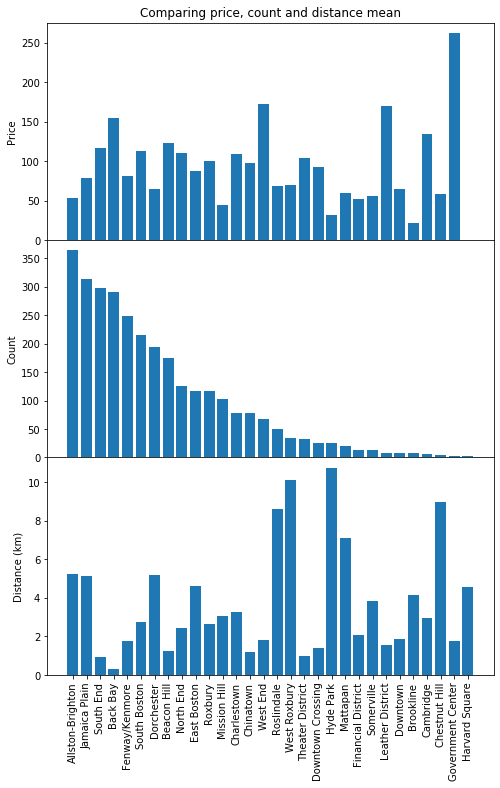

In [206]:
x = dfc_dist_sort['neighbourhood']
y = dfc_dist_sort['price']
z = dfc_dist_sort['count']
w = dfc_dist_sort['dist']
fig, axs = plt.subplots(3, 1, sharex=True,figsize=(8, 12))
fig.subplots_adjust(hspace=0)
#fig.suptitle('Comparing price, count and distance mean between neighbourhood', fontsize=12)
axs[0].set_title('Comparing price, count and distance mean')
axs[0].bar(x, y)
axs[0].set_ylabel('Price')
axs[1].bar(x, z)
axs[1].set_ylabel('Count')
axs[2].bar(x, w)
axs[2].set_ylabel('Distance (km)')
_ = plt.xticks(rotation=90)
plt.savefig('comp2.png', bbox_inches='tight', dpi = 100)

> Back Bay is the neighborhood where the Boston marathon finish line is located and one of the neighborhoods with the most accommodations in the period. South End and Chinatown are between the two neighborhoods closest to the finish line, being 1.9 km the furthest from them. South End has more lodging options. However Chinatown has the lowest average price. If you don't have accommodation available in Back Bay, or a cheaper option, South End and Chinatown are excellent neighborhood options.

In [207]:
dfc_dist_sort[dfc_dist_sort['neighbourhood'].isin(['South End', 'Chinatown'])].head()

,neighbourhood,latitude,longitude,dist,price,count
26,South End,42.342303,-71.074069,0.915764,116.854919,298
7,Chinatown,42.350705,-71.061584,1.207927,97.789742,78


- Analyzing the South End and Chinatown neighborhoods

In [208]:
dfc_list_neig = dfc_listings[(dfc_listings['april'] > 0) & (dfc_listings['neighbourhood'].isin(['South End', 'Chinatown']))]
dfc_list_neig.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,march,april,may,diff,diff2
557,3401809,https://www.airbnb.com/rooms/3401809,20160906204935,2016-09-07,[1857-1]1BR At Radian Apartments,.,"Radian offers fantastic modern apartment homes with fully-equipped kitchens, over-sized windows, sleek modern finishes, Plyboo flooring and much more. Radian has been designed with environmentally responsible materials and systems to achieve LEED certification from the U.S. Green Building Council. With original works of art throughout amenity spaces, luxuriously designed entertainment rooms, an innovative fitness center and personalized services provided by a 24/7 concierge, Radian creates a truly cosmopolitan atmosphere tailored for contemporary living. Also residents can enjoy a convenient location with nearby transportation hubs, making all areas of Boston easily accessible, along with the finest dining, shopping and entertainment. Radian is located close to key transportation hubs, making all areas of Boston and Logan International Airport easily accessible. Nearby South Station offers connections throughout the metropolitan area and the northeast via the T, the Silver Line, Amtrak",". Radian offers fantastic modern apartment homes with fully-equipped kitchens, over-sized windows, sleek modern finishes, Plyboo flooring and much more. Radian has been designed with environmentally responsible materials and systems to achieve LEED certification from the U.S. Green Building Council. With original works of art throughout amenity spaces, luxuriously designed entertainment rooms, an innovative fitness center and personalized services provided by a 24/7 concierge, Radian creates a truly cosmopolitan atmosphere tailored for contemporary living. Also residents can enjoy a convenient location with nearby transportation hubs, making all areas of Boston easily accessible, along with the finest dining, shopping and entertainment. Radian is located close to key transportation hubs, making all areas of Boston and Logan International Airport easily accessible. Nearby South Station offers connections throughout the metropolitan area and the northeast via the T, the Silver Line, Amtr",NaN,NaN,NaN,NaN,NaN,Pets Allowed ( With Fee ) NO Smoking,NaN,NaN,https://a0.muscache.com/im/pictures/90406270/48e4ec41_original.jpg?aki_policy=large,NaN,25188,https://www.airbnb.com/users/show/25188,Seamless,2009-07-10,US,"ABOUT US:\r\n\r\nSeamlessTransition is a full-service relocation agency. \r\n\r\nSeamlessTransition offers short-term housing options to executives, medical professionals and leisure travelers looking to secure transitional housing in major cities throughout the United States. \r\n\r\nWe match an individual's or family's sho

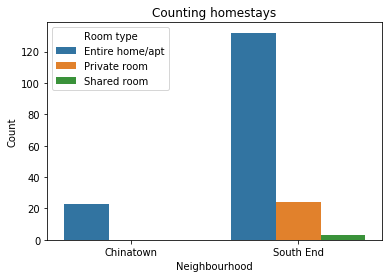

In [209]:
ax = sns.countplot(x='neighbourhood',data=dfc_list_neig,hue='room_type')
ax.set_title('Counting homestays')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')
plt.legend(title='Room type', loc='upper left', labels=['Entire home/apt','Private room','Shared room'])
_ = plt.savefig('sel_neigh.png', dpi = 50)

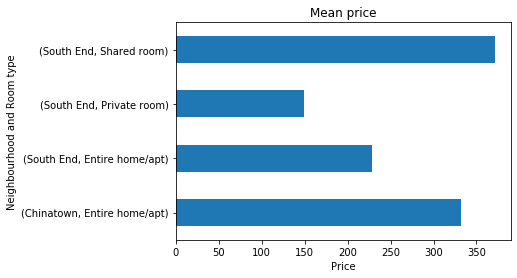

In [210]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type'])['april'].mean().plot.barh()
ax.set_title('Mean price')
ax.set_ylabel('Neighbourhood and Room type')
ax.set_xlabel('Price')
_ = plt.savefig('sel_neigh_price.png',bbox_inches='tight', dpi = 100)

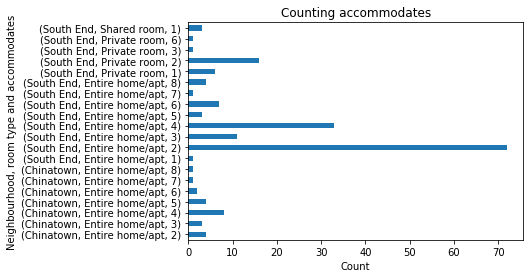

In [211]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].count().plot.barh()
ax.set_title('Counting accommodates')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Count')
_ = plt.savefig('room_type__acom_count.png',bbox_inches='tight', dpi = 720)

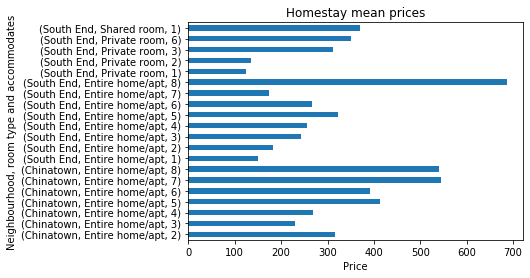

In [212]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].mean().plot.barh()
ax.set_title('Homestay mean prices')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Price')
_ = plt.savefig('room_type__acom_price.png',bbox_inches='tight', dpi = 100)

In [213]:
dfc_rs = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].mean().reset_index()

In [214]:
dfc_rs['prop'] = dfc_rs['april']/dfc_rs['accommodates']

In [215]:
dfc_rs = dfc_rs.groupby(['neighbourhood','room_type','accommodates']).apply(calc_prop)

In [216]:
dfc_rs['ind'] = '('+dfc_rs['neighbourhood']+','+dfc_rs['room_type']+','+str(dfc_rs['accommodates'])+')'

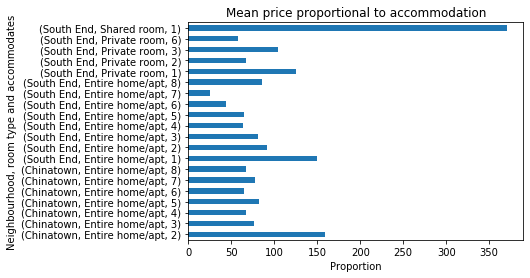

In [217]:
ax = dfc_rs.groupby(['neighbourhood','room_type','accommodates'])['prop'].mean().plot.barh()
ax.set_title('Mean price proportional to accommodation')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Proportion')
_ = plt.savefig('room_type__acom_prop.png',bbox_inches='tight', dpi = 100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

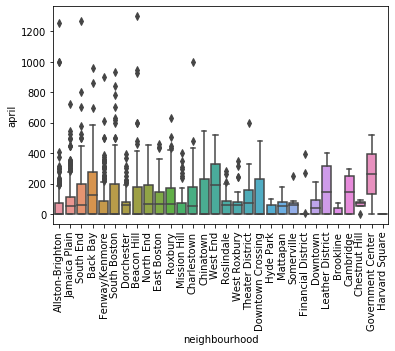

In [220]:
sns.boxplot(data=dfc_listings[dfc_listings['april'] < 1500],x='neighbourhood',y='april',order=list_neighbourhood)
plt.xticks(rotation=90)